# Import the necessary libraries

In [76]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()
%matplotlib inline
from sklearn import metrics

#setting up for customized printing
from IPython.display import Markdown, display
from IPython.display import HTML
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
#function to display dataframes side by side    
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline;margin-left:50px !important;margin-right: 40px !important"'),raw=True)

# Read the data as a data frame

In [77]:
bankLoan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bankLoan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Details of the Attributes and Banking Terms

1. **ID**: Customer's ID.
2. **Age** : Customer's age in completed years.
3. **Experience** : Number of years of professional experience.
4. **Income** : Annual income of the customer in thousand dollars (\$000)
5. **ZIP Code** : Home Address ZIP code.
6. **Family** : Family size of the customer.
7. **CCAvg** : Average spending on credit cards per month in thousand dollars (\$000).
8. **Education** : Level of Education,
                1: Undergrad
                2: Graduate
                3: Advanced/Professional
9. **Mortgage** : A mortgage is a loan in which property or real estate is used as collateral. The borrower enters into an agreement with the lender (usually a bank) wherein the borrower receives cash upfront then makes payments over a set time span until he pays back the lender in full. This feature specified value of house mortgage if any, in thousand dollars (\$000).
10. **Personal Loan** : This feature specified whether customers accepted the personal loan offered in the last campaign.
11. **Securities Account** : A securities account sometimes known as a **Brokerage Account** is an account that holds financial assets such as securities on behalf of an investor with a bank, broker or custodian. Investors and traders typically have a securities account with the broker or bank they use to buy and sell securities. This feature specified whether customers have a securities account with the bank. There is a possiblity that customers can avail loan against Securities. **Loans Against Securities** is available in the form of an overdraft facility which is pledged against financial securities like shares, units and bonds. Loan Against Shares/Bonds/Mutual Funds is basically a loan wherein you pledge the securities you have invested in as collateral against the loan amount.
12. **CD Account** : Certificates of deposit are a secure form of time deposit, where money must stay in the bank for a certain length of time to earn a promised return. A CD, also called a “**Share Certificate**” at credit unions, almost always earns more interest than a regular savings account. This feature specifies whether customers have a certificate of deposit (CD) account with the bank or not. There is a possiblity that customers can avail loan against CD Accounts called a **CD loan**, which is a type of personal loan you obtain by putting up a certificate of deposit as collateral.
13. **Online** : This feature specifies whether customers use internet banking facilities.
14. **Credit card** : This feature specifies whether customers use a credit card issued by UniversalBank.

## Shape of the data

In [78]:
print('The total number of rows :', bankLoan.shape[0])
print('The total number of columns :', bankLoan.shape[1])

The total number of rows : 5000
The total number of columns : 14


## Data type of each attribute

In [79]:
bankLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Removing ID and ZIP Code columns as they are redundant

In [80]:
bankLoan.drop('ID', axis = 1, inplace=True)
bankLoan.drop('ZIP Code', axis = 1, inplace=True)

## Checking the presence of missing values

In [81]:
print(bankLoan.isna().sum())
print('=============================')
print(bankLoan.isnull().sum())
print('=============================')
printmd('**CONCLUSION**: As seen from the data above, we conclude there are **"NO Missing"** values in the data', color="blue")

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


<span style='color:blue'>**CONCLUSION**: As seen from the data above, we conclude there are **"NO Missing"** values in the data</span>

## Checking the presence of invalid values

In [82]:
printmd('**Find the names of columns having negative values**', color="brown")
print([bankLoan[bankLoan[col] < 0].Experience.value_counts() for col in bankLoan.columns if any(bankLoan[col] < 0)])
print('=============================')
printmd('**CONCLUSION**: There are **"NEGATIVE"** values in the **"Experience"** column', color="blue")

<span style='color:brown'>**Find the names of columns having negative values**</span>

[-1    33
-2    15
-3     4
Name: Experience, dtype: int64]


<span style='color:blue'>**CONCLUSION**: There are **"NEGATIVE"** values in the **"Experience"** column</span>

## Imputation of Experience Column

In [83]:
printmd('**Replace the negative values with nan**', color="brown")
bankLoan = bankLoan.assign(Experience = lambda x: x.Experience.where(x.Experience.ge(0)))
print(bankLoan.Experience.isna().sum())

print('=============================')

printmd('**Since the imputation needs to be done in only 1 columns (Experience), we will use fillna imputation method**', color="brown")

print(f'Median of Experience Column is {bankLoan.Experience.median()}')

print('=============================')

print(f'Mean of Experience Column before imputation is {bankLoan.Experience.mean()}')
bankLoan.Experience = bankLoan.Experience.fillna(bankLoan.Experience.median())
print(f'Mean of Experience Column after imputation is {bankLoan.Experience.mean()}')


<span style='color:brown'>**Replace the negative values with nan**</span>

52


<span style='color:brown'>**Since the imputation needs to be done in only 1 columns (Experience), we will use fillna imputation method**</span>

Median of Experience Column is 20.0
Mean of Experience Column before imputation is 20.33104284559418
Mean of Experience Column after imputation is 20.3276


## 5 point summary of numerical attributes

In [84]:
bankLoan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


#### Observations
1. **Age**: It is uniformly distributed with mean and median being almost equal

2. **Experience**: It is uniformly distributed with mean and median being almost equal

3. **Income**: It looks a bit skewed towards right side as mean (73.77) is greater than median 50% (64.0) and there may be few outliers at the top end of values.

4. **Family**: Can be considered as a categorical variable with values of 1,2,3,4.

5. **CCAvg**: It looks a bit skewed towards right side as mean (1.93) is greater than median 50% (1.5) and there may be few outliers at the top end of values.

6. **Education**: It is a categorical variable with values of 1,2,3.

7. **Mortgage**: It is unevenly distributed with zero median and mean of 56.49. There are lot of zeroes and few high values. 

8. **Personal Loan**, **Securities Account**, **CD Account**, **Online**, **CreditCard**: These are categorical variables with values of 0,1.

## Distributions of Continuous attributes

In [85]:
bankLoan[bankLoan['Personal Loan'] == 0]['Age']

0       25
1       45
2       39
3       35
4       35
        ..
4995    29
4996    30
4997    63
4998    65
4999    28
Name: Age, Length: 4520, dtype: int64

Text(0.5, 0, 'Mortgage')

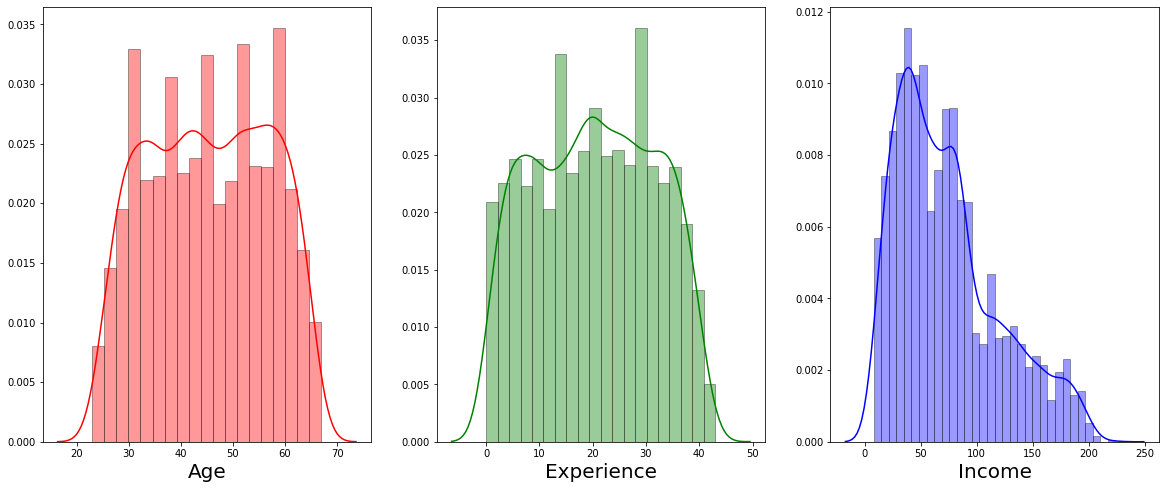

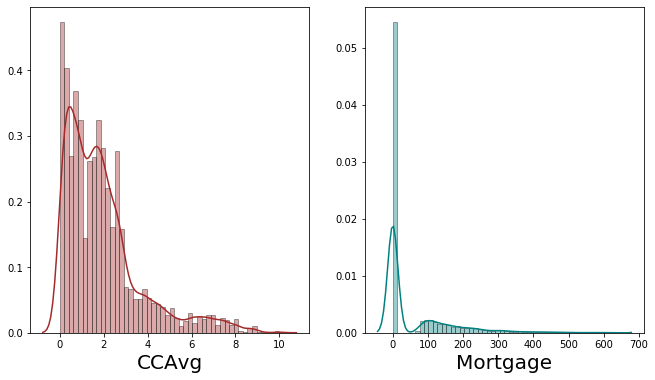

In [86]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))
age = sns.distplot(bankLoan['Age'], color="red", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
age.set_xlabel("Age",fontsize=20)

exp = sns.distplot(bankLoan['Experience'], color='green', ax = axes[1], kde=True, hist_kws={"edgecolor":"k"})
exp.set_xlabel("Experience",fontsize=20)

income = sns.distplot(bankLoan['Income'], color='blue', ax = axes[2], kde=True, hist_kws={"edgecolor":"k"})
income.set_xlabel("Income",fontsize=20)

f, axes = plt.subplots(1, 2, figsize=(11, 6))

ccavg = sns.distplot(bankLoan['CCAvg'], color="brown", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
ccavg.set_xlabel("CCAvg",fontsize=20)

mort = sns.distplot(bankLoan['Mortgage'], color="teal", ax=axes[1], kde=True, hist_kws={"edgecolor":"k"})
mort.set_xlabel("Mortgage",fontsize=20)


#### Observations

1. **Age** and **Experience** are evenly distributed and looks almost the same
2. **Income** is slightly right skewed with few outliers
3. **CCAvg** is right skewed with few outliers
4. **Mortgage** contains many zeroes and lot of high values

In [87]:
pd.DataFrame.from_dict(dict(
    {
        'Age':bankLoan.Age.skew(), 
        'Experience': bankLoan.Experience.skew(), 
        'Income': bankLoan.Income.skew(),
        'CCAvg': bankLoan.CCAvg.skew(),
        'Mortgage': bankLoan.Mortgage.skew()        
    }), orient='index', columns=['Skewness'])

,Skewness
Age,-0.029341
Experience,-0.014100
Income,0.841339
CCAvg,1.598443
Mortgage,2.104002


1. **Age** : Value is is close to 0, hence uniformly distributed as shown in the plot above.
2. **Experience** : Values is close to 0, hence uniformly distributed as shown in the plot above.
3. **Income**: Value is slightly high and hence right skewed as shown in the plot above.
4. **CCAvg**: Value is high and hence right skewed as shown in the plot above.
5. **Mortgage**: Value is high and hence right skewed as shown in the plot above.

## Checking the presence of outliers in ‘Income’, ‘CCAvg’ and ‘Mortgage’ columns

Text(0.5, 0, 'Mortgage')

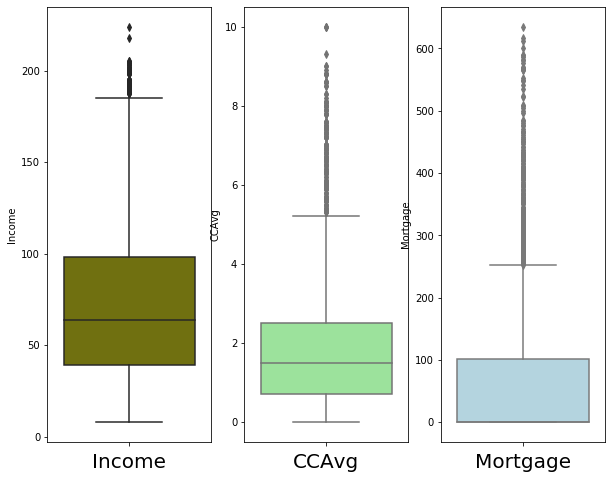

In [88]:
f, axes = plt.subplots(1, 3, figsize=(10, 8))
income = sns.boxplot(bankLoan['Income'], color="olive", ax=axes[0], orient='v')
income.set_xlabel("Income",fontsize=20)

ccavg = sns.boxplot(bankLoan['CCAvg'], color='lightgreen', ax=axes[1], orient='v')
ccavg.set_xlabel("CCAvg",fontsize=20)

mort = sns.boxplot(bankLoan['Mortgage'], color='lightblue', ax=axes[2], orient='v')
mort.set_xlabel("Mortgage",fontsize=20)


#### Observation
1. The above plots confirm the presence of several outliers in **Income**, **CCAvg**, **Mortgage** columns.
2. There is no bottom whisker or Q1(25%) for **Mortgage** as Q2(50%) starts at '0'. This means data is heavily skewed towards right with most of the values being zeros and others being large values. It can also seen that there lot more outliers than any other attribute.


## Different values of each categorical feature and their distributions

In [89]:
plData = pd.DataFrame(bankLoan['Personal Loan'].value_counts(), columns=['Personal Loan'])
saData = pd.DataFrame(bankLoan['Securities Account'].value_counts(), columns=['Securities Account'])
cdacctData = pd.DataFrame(bankLoan['CD Account'].value_counts(), columns=['CD Account'])
onlineData = pd.DataFrame(bankLoan['Online'].value_counts(), columns=['Online'])
ccData = pd.DataFrame(bankLoan['CreditCard'].value_counts(), columns=['CreditCard'])

cat = pd.concat([plData,saData,onlineData,cdacctData,ccData], axis=1)
display(cat)
print('=============================')
edu = pd.DataFrame(bankLoan.Education.value_counts(), columns=['Education'])
display(edu.sort_index())
print('=============================')
fam = pd.DataFrame(bankLoan.Family.value_counts(), columns=['Family'])
display(fam.sort_index())

,Personal Loan,Securities Account,Online,CD Account,CreditCard
0,4520,4478,2016,4698,3530
1,480,522,2984,302,1470


,Education
1,2096
2,1403
3,1501


,Family
1,1472
2,1296
3,1010
4,1222


Text(0.5, 0, 'Education')

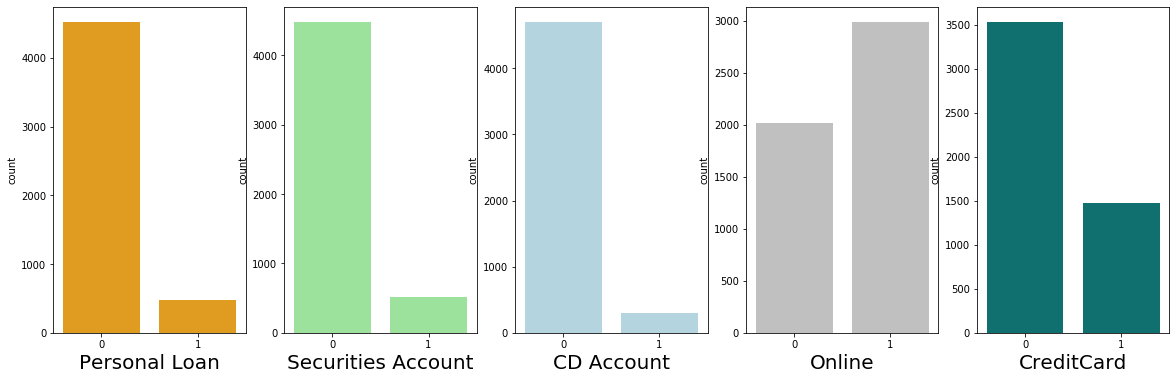

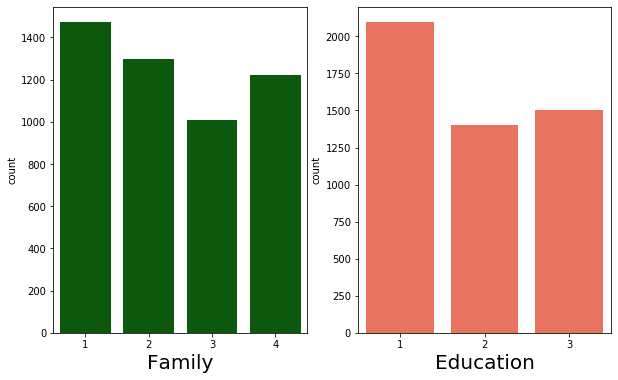

In [90]:
f, axes = plt.subplots(1, 5, figsize=(20, 6))
pl = sns.countplot(bankLoan['Personal Loan'], color="orange", ax=axes[0])
pl.set_xlabel("Personal Loan",fontsize=20)

secacct = sns.countplot(bankLoan['Securities Account'], color='lightgreen', ax = axes[1])
secacct.set_xlabel("Securities Account",fontsize=20)

cdacct = sns.countplot(bankLoan['CD Account'], color='lightblue', ax = axes[2])
cdacct.set_xlabel("CD Account",fontsize=20)

online = sns.countplot(bankLoan['Online'], color='silver', ax = axes[3])
online.set_xlabel("Online",fontsize=20)

cc = sns.countplot(bankLoan['CreditCard'], color='teal', ax = axes[4])
cc.set_xlabel("CreditCard",fontsize=20)

f, axes = plt.subplots(1, 2, figsize=(10, 6))
family = sns.countplot('Family',data=bankLoan, color='darkgreen', ax=axes[0])
family.set_xlabel("Family",fontsize=20)

edu = sns.countplot('Education',data=bankLoan, color='tomato', ax = axes[1])
edu.set_xlabel("Education",fontsize=20)

#### Observations

1. **Personal Loan**: This is the **TARGET** column. Many customers did not accept the personal loan offered and hence look very imbalanced.
2. **Securities Account**: Many customers do not have a securities account with the bank. Looks imbalanced.
3. **CD Account**: Many customers do not have a certificate of deposit (CD) account with the bank. Looks imbalanced.
4. **Online**: Customers usage of internet banking facilities is at 60% and no-usage is at 40%. This is fairly distributed.
5. **CreditCard**: Many customers (70%) do not use a credit card issued by UniversalBank.
6. **Family**: Family size is fairly distributed with size of '3' being a bit low.
7. **Education**: Education levels (Undergrads, Graduates, Professionals) are failrly distributed with undergrads being higher than others.

<span style='color:brown'>**Count of Personal Loans availed**</span>

,Securities Account,CD Account,Online,CreditCard
0,420,340,189,337
1,60,140,291,143


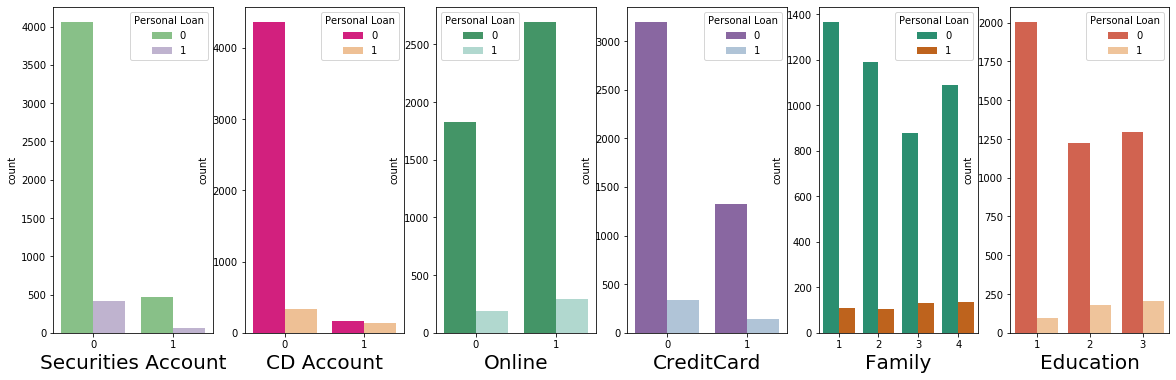

In [91]:
f, axes = plt.subplots(1, 6, figsize=(20, 6))

secacct = sns.countplot('Securities Account', data=bankLoan, hue='Personal Loan', palette='Accent', ax = axes[0])
secacct.set_xlabel("Securities Account",fontsize=20)

cdacct = sns.countplot(bankLoan['CD Account'], data=bankLoan, hue='Personal Loan', palette='Accent_r', ax = axes[1])
cdacct.set_xlabel("CD Account",fontsize=20)

online = sns.countplot(bankLoan['Online'], data=bankLoan, hue='Personal Loan', palette='BuGn_r', ax = axes[2])
online.set_xlabel("Online",fontsize=20)

cc = sns.countplot(bankLoan['CreditCard'], data=bankLoan, hue='Personal Loan', palette='BuPu_r', ax = axes[3])
cc.set_xlabel("CreditCard",fontsize=20)

#f, axes = plt.subplots(1, 2, figsize=(10, 6))
family = sns.countplot('Family',data=bankLoan, palette='Dark2', hue='Personal Loan', ax=axes[4])
family.set_xlabel("Family",fontsize=20)

edu = sns.countplot('Education',data=bankLoan, palette='OrRd_r', hue='Personal Loan', ax = axes[5])
edu.set_xlabel("Education",fontsize=20)


printmd('**Count of Personal Loans availed**', color='brown')
secacct = pd.DataFrame(bankLoan[bankLoan['Personal Loan'] == 1]['Securities Account'].value_counts(), columns=['Securities Account'])
cdacct = pd.DataFrame(bankLoan[bankLoan['Personal Loan'] == 1]['CD Account'].value_counts(), columns=['CD Account'])
online = pd.DataFrame(bankLoan[bankLoan['Personal Loan'] == 1]['Online'].value_counts(), columns=['Online'])
cc = pd.DataFrame(bankLoan[bankLoan['Personal Loan'] == 1]['CreditCard'].value_counts(), columns=['CreditCard'])

cat = pd.concat([secacct,cdacct,online,cc], axis=1)
display(cat)

##### Observations

1. As per the data, customers who did not accept the **Personal Loan** are very high. The same is shown across different values of the categorical attributes **Securities Account**, **CD Account**, **Online**, **Family**, **Education**.
2. **Securities Account**: Number of Personal Loans availed (460) is slightly more for customers with **No Securities Account**. 
3. **CD Account**: Number of Personal Loans availed (340) is slightly more for customers with **No CD Account**.
4. **Online**: Number of Personal Loans availed (291) is slightly more for customers who use internet banking facilities.
5. **CreditCard**: Number of Personal Loans availed (337) is slightly more for customers with **No Credit Card**.
6. **Family**: Availing of **Personal Loan** gradually increases with increase in the family size.
7. **Education**: Availing of **Personal Loan** gradually increases with levels of education i.e. from Undergrads to Professionals.

Text(0, 0.5, 'Mortgage')

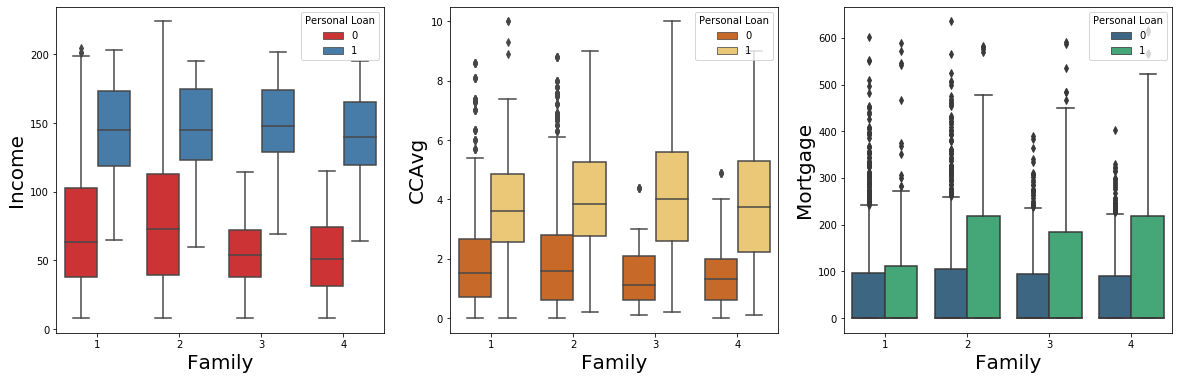

In [92]:
f, axes = plt.subplots(1, 3, figsize=(20, 6))

plt1 = sns.boxplot('Family', 'Income', data=bankLoan, hue='Personal Loan', palette='Set1', ax=axes[0])
plt1.set_xlabel("Family",fontsize=20)
plt1.set_ylabel("Income",fontsize=20)

plt2 = sns.boxplot('Family', 'CCAvg', data=bankLoan, hue='Personal Loan', palette='YlOrBr_r', ax=axes[1])
plt2.set_xlabel("Family",fontsize=20)
plt2.set_ylabel("CCAvg",fontsize=20)

plt3 = sns.boxplot('Family', 'Mortgage', data=bankLoan, hue='Personal Loan', palette='viridis', ax=axes[2])
plt3.set_xlabel("Family",fontsize=20)
plt3.set_ylabel("Mortgage",fontsize=20)

#### Observations

1. **Personal Loan** is availed for customers with higher **Income** for families of all sizes.
2. **Personal Loan** is availed for customers with higher **CCAvg** i.e spending average using Credit Card for families of all sizes.
4. **Personal Loan** availed is more for families of sizes 2 and 4 and with higher **Mortgage**. However the count of not availing is almost same for families of all sizes. 

Text(0, 0.5, 'CCAvg')

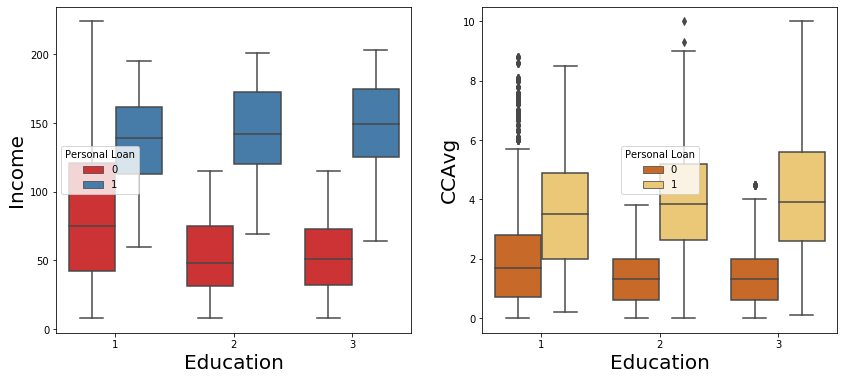

In [93]:
f, axes = plt.subplots(1, 2, figsize=(14, 6))

plt1 = sns.boxplot('Education', 'Income', data=bankLoan, hue='Personal Loan', palette='Set1', ax=axes[0])
plt1.set_xlabel("Education",fontsize=20)
plt1.set_ylabel("Income",fontsize=20)

plt2 = sns.boxplot('Education', 'CCAvg', data=bankLoan, hue='Personal Loan', palette='YlOrBr_r', ax=axes[1])
plt2.set_xlabel("Education",fontsize=20)
plt2.set_ylabel("CCAvg",fontsize=20)

#### Observations

1. Higher the level of **Education**, higher is the **Income**. 
2. Average spend using **Credit Card** gradually increases with levels of **Education**.

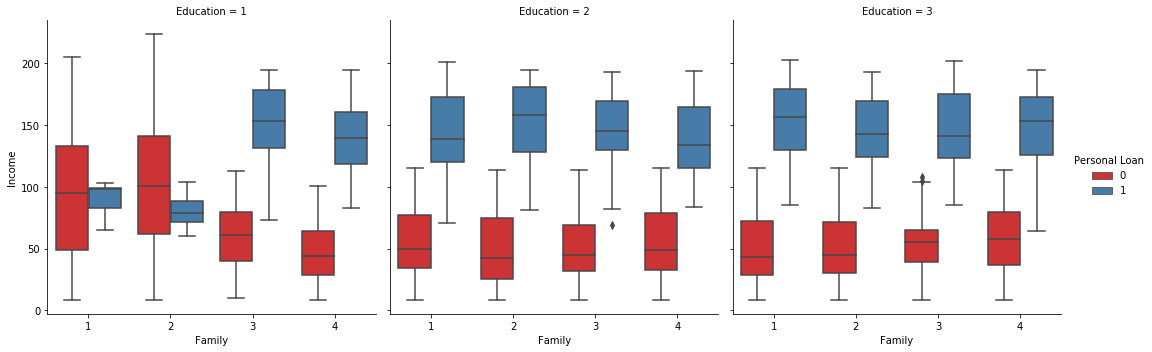

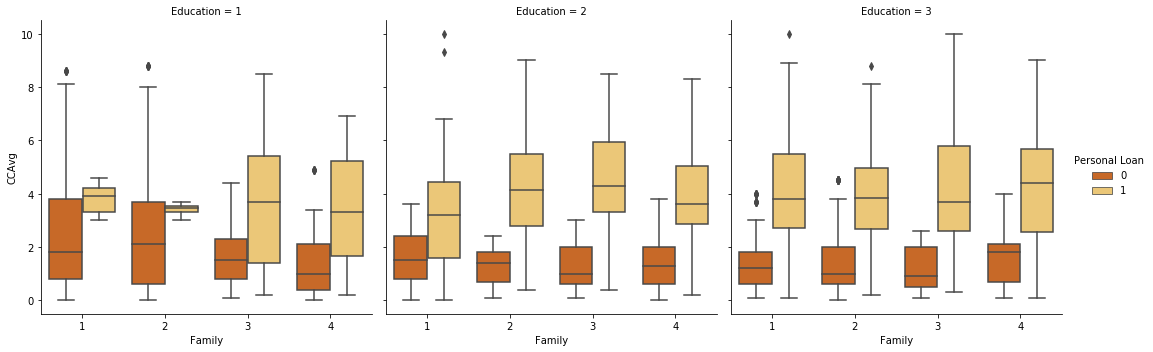

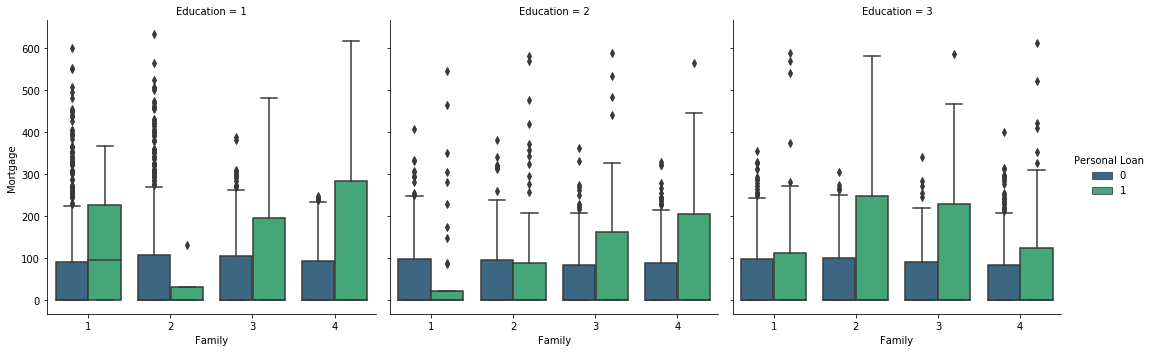

In [94]:
sns.catplot('Family', 'Income', data=bankLoan, hue='Personal Loan', col='Education', kind='box', palette='Set1')

sns.catplot('Family', 'CCAvg', data=bankLoan, hue='Personal Loan', col='Education', kind='box', palette='YlOrBr_r')

sns.catplot('Family', 'Mortgage', data=bankLoan, hue='Personal Loan', col='Education', kind='box', palette='viridis')

## Multivariate Analysis

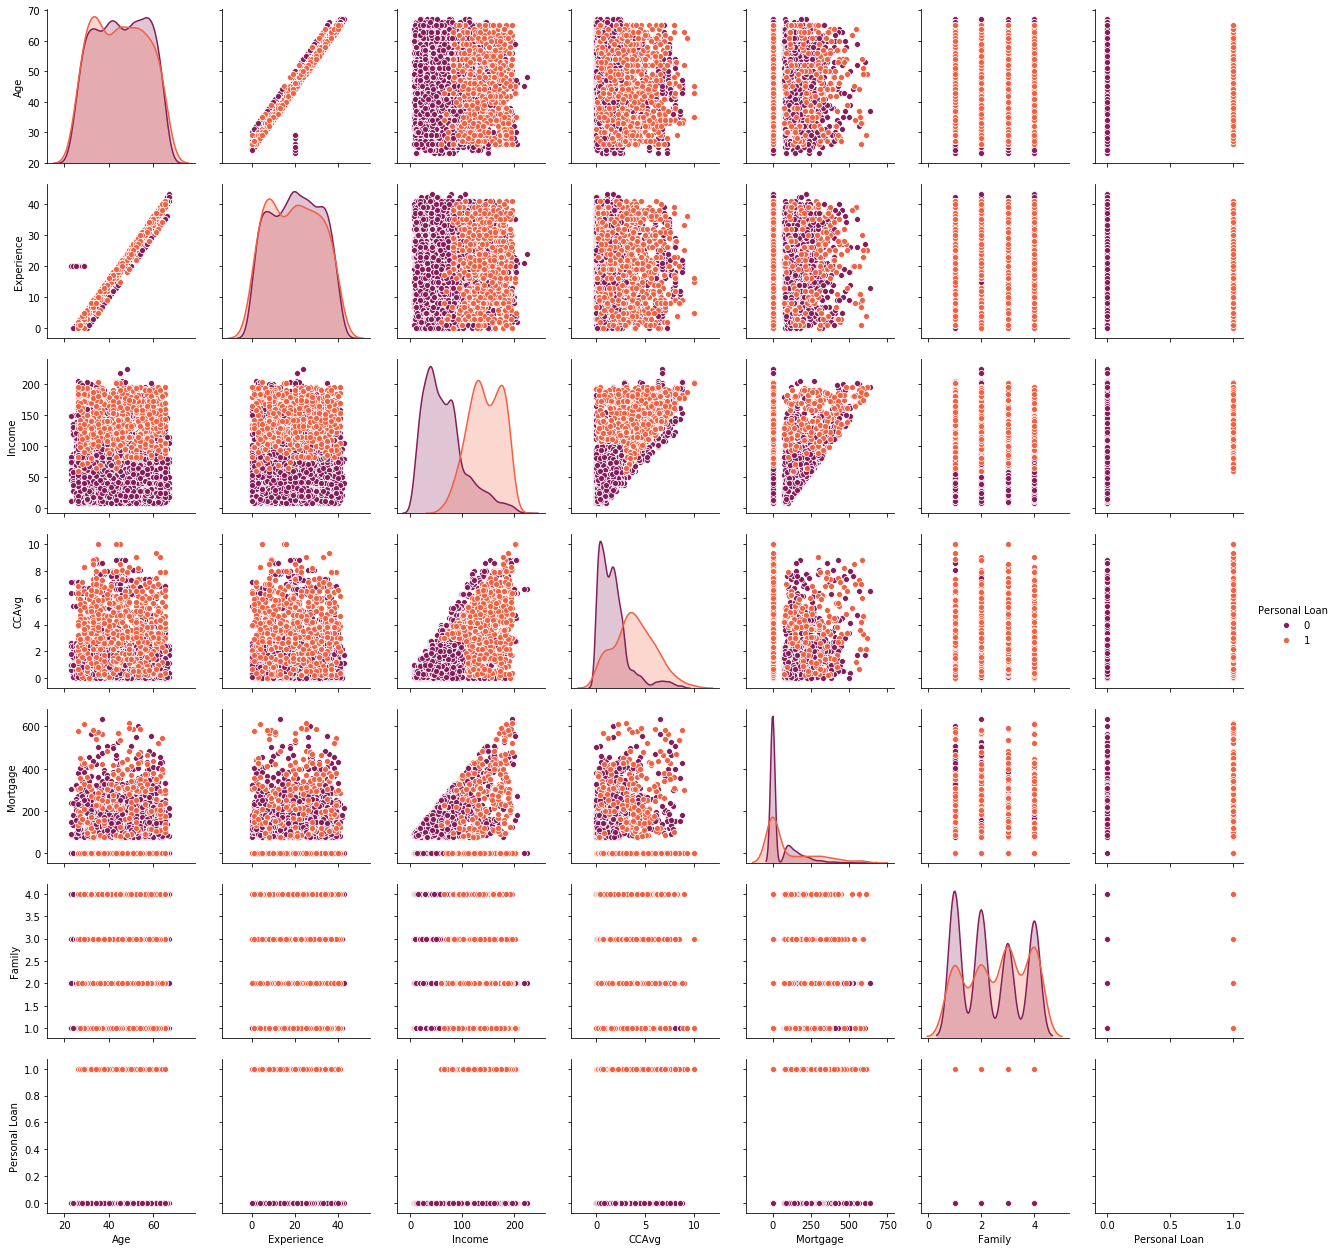

In [95]:
sns.pairplot(bankLoan[['Age','Experience','Income','CCAvg', 'Mortgage', 'Family', 'Personal Loan']], hue='Personal Loan', diag_kind = 'kde', palette='rocket')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

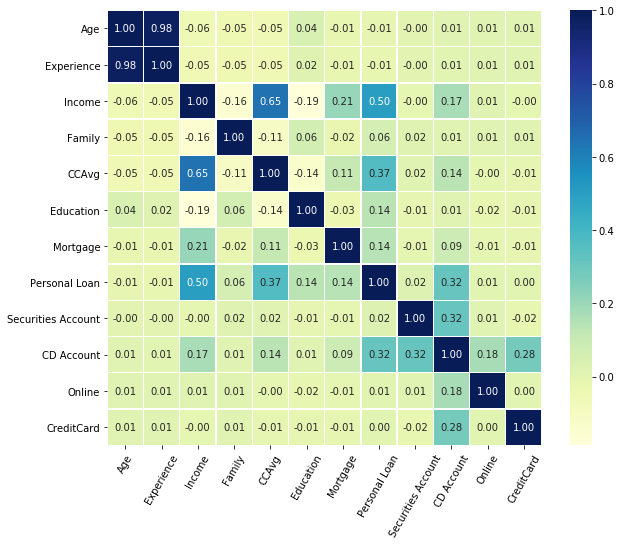

In [96]:
corrData = bankLoan.corr()
f, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(corrData,cmap='YlGnBu', ax=axes, annot=True, fmt=".2f", linecolor='white', linewidths=0.3, square=True)
plt.xticks(rotation=60)

#### Observations

1. **Age** and **Experience** have very high correlation (0.98) and the relationship is close to linearly perfect. This is shown is above pairplot and heatmap. Either one can be removed. 
2. **Income** and **CCAvg** have good correlation (0.65)
3. Target attribute **Personal Loan** has a good correlation with **Income**, **CCAvg** and **CD Account**

In [97]:
bankLoan['Education'] = bankLoan['Education'].astype(dtype='category')
bankLoan['Family'] = bankLoan['Family'].astype(dtype='category')

## Check Correlation Matrix and Heatmap for Dimensionality Reduction

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

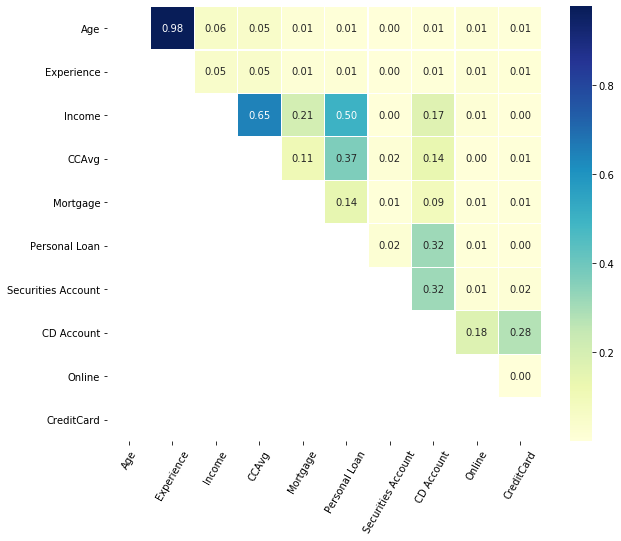

In [98]:
# Create correlation matrix
corr_matrix = bankLoan.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
f, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(upper,cmap='YlGnBu', annot=True, fmt=".2f", ax=axes, linecolor='white', linewidths=0.3, square=True)
plt.xticks(rotation=60)

In [99]:
# Find index of feature columns with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
printmd('List of columns with correlation higher than 0.95', color='brown')
display(to_drop)

printmd('Removing **"Experience"** column due to **Multicollinearity**', color='brown')

bankLoanNew = bankLoan.drop('Experience', axis = 1)
bankLoanNew.info()

<span style='color:brown'>List of columns with correlation higher than 0.95</span>

['Experience']

<span style='color:brown'>Removing **"Experience"** column due to **Multicollinearity**</span>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(2), float64(1), int64(8)
memory usage: 361.7 KB


## Applying Log Transformation to the 'Mortgage' feature to reduce skewness

,Skewness
Mortgage Without Log Transformation,2.104002
Mortgage After First Log Transformation,0.876688
Mortgage After Second Log Transformation,0.842914


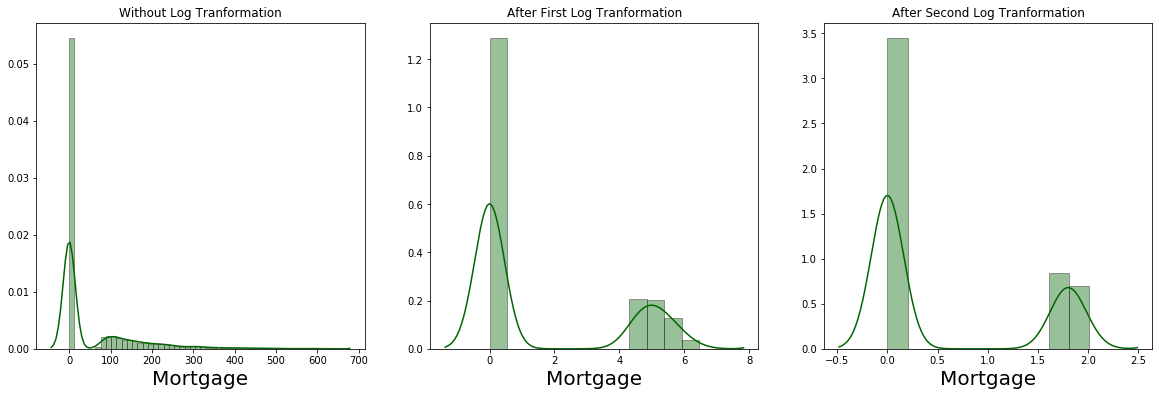

In [100]:
f, axes = plt.subplots(1, 3, figsize=(20, 6))

mort = sns.distplot(bankLoanNew['Mortgage'], color="darkgreen", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
mort.set_xlabel("Mortgage",fontsize=20)
mort.set_title('Without Log Tranformation')

firstLogTransform = np.log1p(bankLoanNew['Mortgage'])
mort = sns.distplot(firstLogTransform, color="darkgreen", kde=True, ax=axes[1], hist_kws={"edgecolor":"k"})
mort.set_xlabel("Mortgage",fontsize=20)
mort.set_title('After First Log Tranformation')

secondLogTransform = np.log1p(firstLogTransform)
mort = sns.distplot(secondLogTransform, color="darkgreen", kde=True,ax=axes[2], hist_kws={"edgecolor":"k"})
mort.set_xlabel("Mortgage",fontsize=20)
mort.set_title('After Second Log Tranformation')

mortSkew = pd.DataFrame.from_dict(dict(
    {
        'Mortgage Without Log Transformation':bankLoan.Mortgage.skew(), 
        'Mortgage After First Log Transformation': firstLogTransform.skew(), 
        'Mortgage After Second Log Transformation': secondLogTransform.skew()
    }), orient='index', columns=['Skewness'])

display(mortSkew)

bankLoanNew['Mortgage'] = secondLogTransform

## Applying Log Transformation to the 'CCAvg' feature to reduce skewness

,Skewness
CCAvg Without Log Transformation,1.598443
CCAvg After First Log Transformation,0.319224


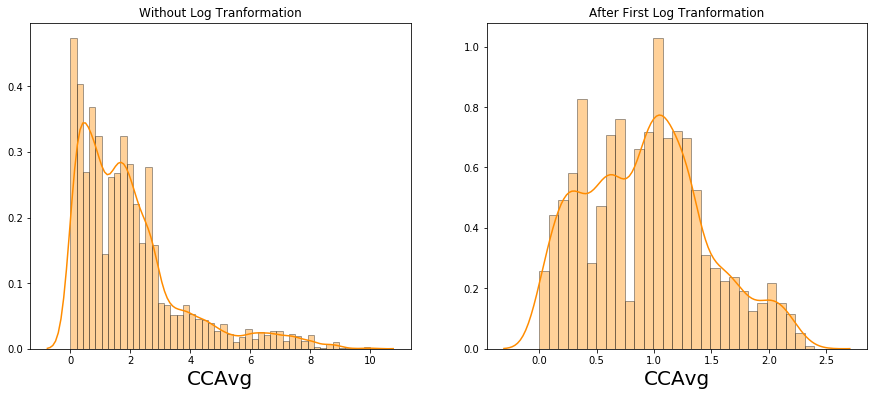

In [101]:
f, axes = plt.subplots(1, 2, figsize=(15, 6))

ccavg = sns.distplot(bankLoanNew['CCAvg'], color="darkorange", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
ccavg.set_xlabel("CCAvg",fontsize=20)
ccavg.set_title('Without Log Tranformation')

firstLogTransform = np.log1p(bankLoanNew['CCAvg'])
ccavg = sns.distplot(firstLogTransform, color="darkorange", kde=True, ax=axes[1], hist_kws={"edgecolor":"k"})
ccavg.set_xlabel("CCAvg",fontsize=20)
ccavg.set_title('After First Log Tranformation')

ccavgSkew = pd.DataFrame.from_dict(dict(
    {
        'CCAvg Without Log Transformation':bankLoan.CCAvg.skew(), 
        'CCAvg After First Log Transformation': firstLogTransform.skew()
    }), orient='index', columns=['Skewness'])

display(ccavgSkew)

bankLoanNew['CCAvg'] = firstLogTransform

## One-Hot Encoding for ‘Family’, ‘Education’ columns

In [102]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(categories='auto')
encodedData = onehotencoder.fit_transform(bankLoanNew[['Family','Education']]).toarray() 
encodedFeatures = pd.DataFrame(encodedData, columns= onehotencoder.get_feature_names(['Family','Education']))
encodedFeatures.head(2)

,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [103]:
printmd('''Dropping last encoded feature in each attribute i.e **Family_4**, **Education_3** can be **DROPPED** as information for these features
can be obtained from others''', color='brown')

encodedFeatures.drop(['Family_4', 'Education_3'], axis=1, inplace=True)
bankLoanNew.drop(['Family', 'Education'], axis=1, inplace=True)

<span style='color:brown'>Dropping last encoded feature in each attribute i.e **Family_4**, **Education_3** can be **DROPPED** as information for these features
can be obtained from others</span>

In [104]:
encodedFeatures.head(2)

,Family_1,Family_2,Family_3,Education_1,Education_2
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0


In [105]:
bankLoanNew = pd.concat([bankLoanNew,encodedFeatures],axis=1)
bankLoanNew.head(2)

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_1,Family_2,Family_3,Education_1,Education_2
0,25,49,0.955511,0.0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0
1,45,34,0.916291,0.0,0,1,0,0,0,0.0,0.0,1.0,1.0,0.0


## Split the data into training and test set in the ratio of 70:30 respectively

In [106]:
printmd('**As "Personal Loan" attribute is imbalanced, STRATIFYING the same to maintain the same percentage of distribution**', color='brown')
X = bankLoanNew.loc[:, bankLoanNew.columns != 'Personal Loan']
y = bankLoanNew['Personal Loan']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size =.30, random_state=1)

printmd('**Training and Testing Set Distribution**', color='brown')

print(f'Training set has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'Testing set has {X_test.shape[0]} rows and {X_test.shape[1]} columns')

printmd('**Original Set Target Value Distribution**', color='brown')

print("Original Personal Loan '1' Values    : {0} ({1:0.2f}%)".format(len(bankLoanNew.loc[bankLoanNew['Personal Loan'] == 1]), (len(bankLoanNew.loc[bankLoanNew['Personal Loan'] == 1])/len(bankLoanNew.index)) * 100))
print("Original Personal Loan '0' Values   : {0} ({1:0.2f}%)".format(len(bankLoanNew.loc[bankLoanNew['Personal Loan'] == 0]), (len(bankLoanNew.loc[bankLoanNew['Personal Loan'] == 0])/len(bankLoanNew.index)) * 100))

printmd('**Training Set Target Value Distribution**', color='brown')

print("Training Personal Loan '1' Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan '0' Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))

printmd('**Testing Set Target Value Distribution**', color='brown')
print("Test Personal Loan '1' Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan '0' Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))


<span style='color:brown'>**As "Personal Loan" attribute is imbalanced, STRATIFYING the same to maintain the same percentage of distribution**</span>

<span style='color:brown'>**Training and Testing Set Distribution**</span>

Training set has 3500 rows and 13 columns
Testing set has 1500 rows and 13 columns


<span style='color:brown'>**Original Set Target Value Distribution**</span>

Original Personal Loan '1' Values    : 480 (9.60%)
Original Personal Loan '0' Values   : 4520 (90.40%)


<span style='color:brown'>**Training Set Target Value Distribution**</span>

Training Personal Loan '1' Values    : 336 (9.60%)
Training Personal Loan '0' Values   : 3164 (90.40%)


<span style='color:brown'>**Testing Set Target Value Distribution**</span>

Test Personal Loan '1' Values        : 144 (9.60%)
Test Personal Loan '0' Values       : 1356 (90.40%)


In [107]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text xticklabel objects>)

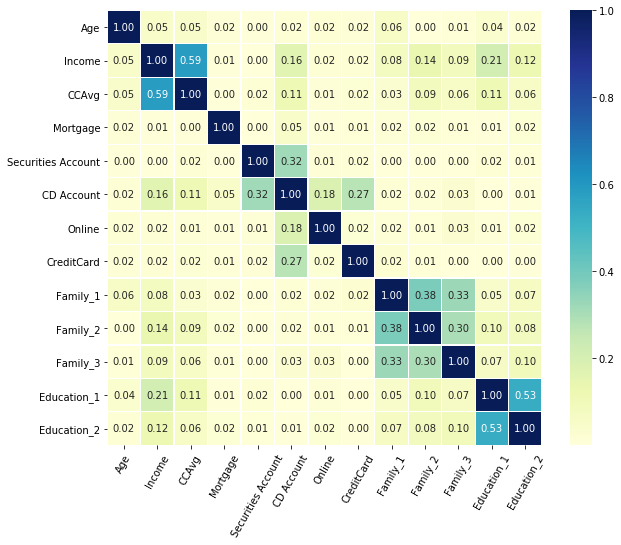

In [108]:
f, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_train_scaled).corr().abs(),cmap='YlGnBu', ax=axes, annot=True, fmt=".2f",xticklabels=X_train.columns, yticklabels=X_train.columns, linecolor='white', linewidths=0.3, square=True)
plt.xticks(rotation=60)

In [109]:
# function for model fitting, prediction and calculating different scores
def Modelling_Prediction_Scores(model, algoName):
    model.fit(X_train_scaled, y_train)
    #predict on train and test
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    #predict the probabilities on train and test
    y_train_pred_proba = model.predict_proba(X_train_scaled) 
    y_test_pred_proba = model.predict_proba(X_test_scaled)

    #get Accuracy Score for train and test
    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    accdf = pd.DataFrame([[accuracy_train, accuracy_test, ]], columns=['Training', 'Testing'], index=['Accuracy'])

    #get Mean Squared Error on train and test
    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)
    msedf = pd.DataFrame([[mse_train, mse_test, ]], columns=['Training', 'Testing'], index=['Mean Squared Error'])

    #get Precision Score on train and test
    precision_train = metrics.precision_score(y_train, y_train_pred)
    precision_test = metrics.precision_score(y_test, y_test_pred)
    precdf = pd.DataFrame([[precision_train, precision_test, ]], columns=['Training', 'Testing'], index=['Precision'])

    #get Recall Score on train and test
    recall_train = metrics.recall_score(y_train, y_train_pred)
    recall_test = metrics.recall_score(y_test, y_test_pred)
    recdf = pd.DataFrame([[recall_train, recall_test, ]], columns=['Training', 'Testing'], index=['Recall'])

    #get F1-Score on train and test
    f1_score_train = metrics.f1_score(y_train, y_train_pred)
    f1_score_test = metrics.f1_score(y_test, y_test_pred)
    f1sdf = pd.DataFrame([[f1_score_train, f1_score_test, ]], columns=['Training', 'Testing'], index=['F1 Score'])

    #get Area Under the Curve (AUC) for ROC Curve on train and test
    roc_auc_score_train = metrics.roc_auc_score(y_train, y_train_pred)
    roc_auc_score_test = metrics.roc_auc_score(y_test, y_test_pred)
    rocaucsdf = pd.DataFrame([[roc_auc_score_train, roc_auc_score_test, ]], columns=['Training', 'Testing'], index=['ROC AUC Score'])

    #get Area Under the Curve (AUC) for Precision-Recall Curve on train and test
    precision_train, recall_train, thresholds_train = metrics.precision_recall_curve(y_train, y_train_pred_proba[:,1])
    precision_recall_auc_score_train = metrics.auc(recall_train, precision_train)
    precision_test, recall_test, thresholds_test = metrics.precision_recall_curve(y_test,y_test_pred_proba[:,1])
    precision_recall_auc_score_test = metrics.auc(recall_test, precision_test)
    precrecaucsdf = pd.DataFrame([[precision_recall_auc_score_train, precision_recall_auc_score_test]], columns=['Training', 'Testing'], index=['Precision Recall AUC Score'])

    #calculate the confusion matrix 
    #print('tn, fp, fn, tp')
    confusion_matrix_test = pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'])

    #display confusion matrix in a heatmap
    f, axes = plt.subplots(1, 2, figsize=(20, 8))
    hmap = sns.heatmap(confusion_matrix_test, cmap='YlGnBu', annot=True, fmt=".0f", ax=axes[0], )
    hmap.set_xlabel('Predicted', fontsize=15)
    hmap.set_ylabel('Actual', fontsize=15)

    #plotting the ROC Curve and Precision-Recall Curve
    fpr, tpr, threshold = metrics.roc_curve(y_test,y_test_pred_proba[:,1])
    plt.plot(fpr, tpr, marker='.', label='ROC Curve')
    plt.plot(recall_test, precision_test, marker='.', label='Precision Recall Curve')
    plt.axes(axes[1])
    plt.title(algoName, fontsize=15)
    # axis labels
    plt.xlabel('ROC Curve - False Positive Rate \n Precision Recall Curve - Recall', fontsize=15)    
    plt.ylabel('ROC Curve - True Positive Rate \n Precision Recall Curve - Precision', fontsize=15)
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    #concatenating all the scores and displaying as single dataframe
    consolidatedDF= pd.concat([accdf, msedf,precdf,recdf,f1sdf, rocaucsdf, precrecaucsdf])

    printmd('**Confusion Matrix**', color='brown')
    display_side_by_side(confusion_matrix_test, consolidatedDF)
    
    return confusion_matrix_test, consolidatedDF

### Details of Classification Metrics

#### Terms used

**TP**: True Positive - Both Predicted and Actual are True

**TN**: True Negative - Both Predicted and Actual are False

**FP**: False Positive - Predicted True but Acutal is False

**FN**: False Negative - Predicted False but Actual is True

**Accuracy**: The accuracy of the model is basically the total number of correct predictions divided by total number of predictions. This is a very useful metrics when the target variable is balanced.

    **Accuracy Score = (TP + TN) / (TP + TN + FP + FN)**

**Mean Squared Error**: This is one minues the accuracy score. 

    **Mean Squared Error = 1 - Accuracy Score**

**Precision**: The precision of a class defines how much we can trust the result when the model predicts that a point belongs to a class. 

    **Precision = TP / TP + FP**

**Recall**: The recall of a class defines how good the model is able to predict a class. 

    **Recall = TP / TP + FN**

**Recall** and **Precision** are useful metrics when the target variable is **Imbalanced**.

**F1 Score**: The F1 score of a class is given by the harmonic mean of precision and recall.
    
    **F1 Score = (2 * Precision * Recall) / (Precision + Recall)** 
    
**ROC AUC Score**: Area under the curve of a ROC (Receiver Operating Characteristic) curve which plots False Positive Rate on X-axis and True Positive Rate on Y-axis. This metric is useful when the target variable is balanced. Higher the area covered, better is the model.

**Precision Recall AUC Score**: Area under the curve of a Precision-Recall curve which plots Recall on X-axis and Precision on Y-axis. This metric is useful when the target variable is imbalanced. Higher the area covered, better is the model.

## Logistic Regression

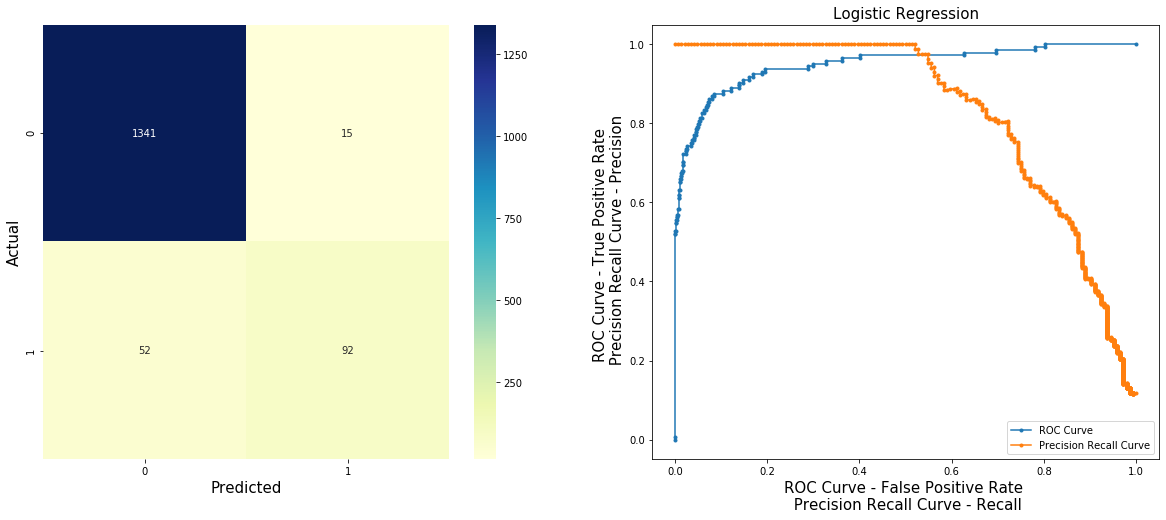

<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1341,15
1,52,92
,Training,Testing
Accuracy,0.963429,0.955333
Mean Squared Error,0.036571,0.044667
Precision,0.874101,0.859813
Recall,0.723214,0.638889
F1 Score,0.791531,0.733068
ROC AUC Score,0.856076,0.813913


In [110]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
logRegModel = LogisticRegression()
cmLR, dfLR = Modelling_Prediction_Scores(logRegModel, 'Logistic Regression')

#### Observations

1. Type-I Error (FP) = 15
2. Type-II Error (FN) = 52
3. **Accuracy** is high, above 95%. 
4. Though **Accuracy** is higher, we need to look at Precision, Recall and AUC under Precision-Recall Curve since the target variable is imbalaced.
5. The metrics on Training and Testing sets are closer.
6. ROC Curve as well as Precision-Recall curve looks good in the plot 
7. Looking at the values of Precision(0.85), Recall(0.63) and AUC(0.83), this looks like a good model. 


### Let us try to see if the model can be improved by setting 'C' (Default is 1) value to a lower value and setting the algorithm as liblinear. 

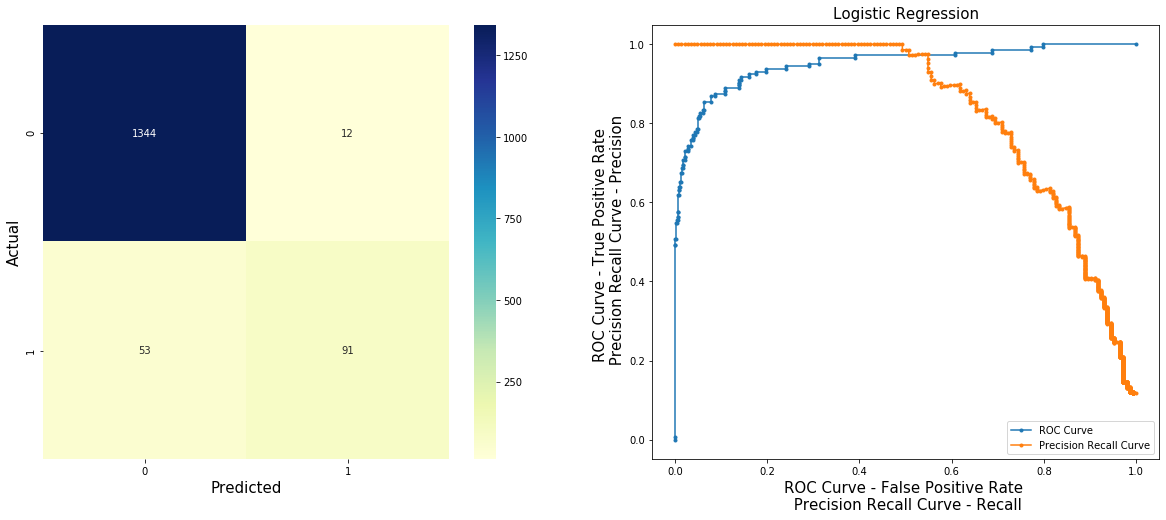

<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1344,12
1,53,91
,Training,Testing
Accuracy,0.960857,0.956667
Mean Squared Error,0.039143,0.043333
Precision,0.881226,0.883495
Recall,0.684524,0.631944
F1 Score,0.770519,0.736842
ROC AUC Score,0.837363,0.811547


In [111]:
# Fit the model on train
# C is inverse of lambda (Regularization Parameter). Hence lower the C value will strenthen the lambda parameter.
logRegModel = LogisticRegression(solver = 'liblinear', C=0.2)
cmLR, dfLR = Modelling_Prediction_Scores(logRegModel, 'Logistic Regression')

#### Observations

Total number of errors are reduced from 67 to 65 and thereby a very marginal increase in values of Precision, Recall and AUC Score.

## Naive Bayes Classification

### Using Gaussian Naive Bayes as some of the features are continuous

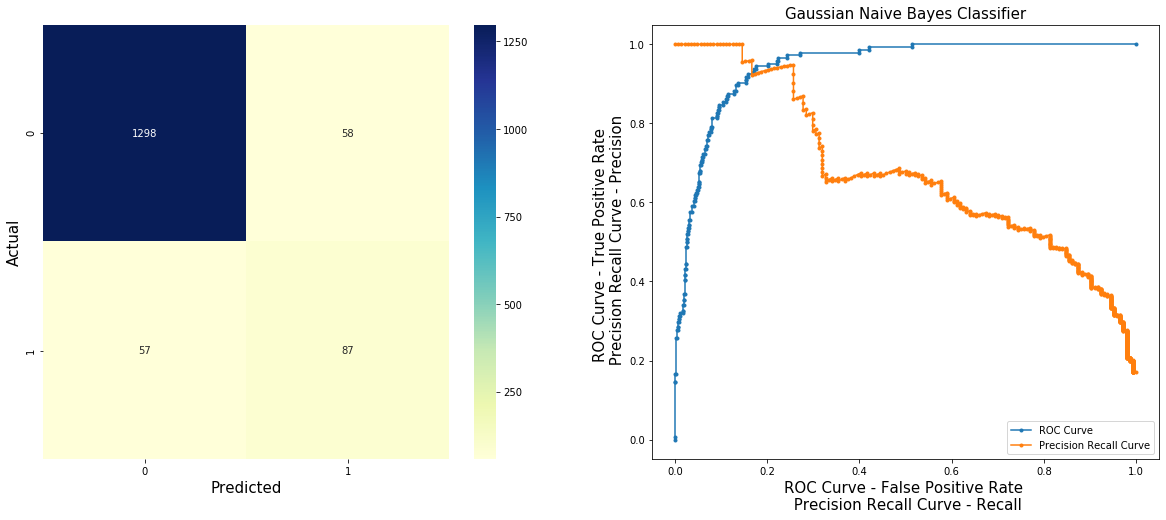

<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1298,58
1,57,87
,Training,Testing
Accuracy,0.921714,0.923333
Mean Squared Error,0.078286,0.076667
Precision,0.592814,0.600000
Recall,0.589286,0.604167
F1 Score,0.591045,0.602076
ROC AUC Score,0.773151,0.780697


In [112]:
from sklearn.naive_bayes import GaussianNB

# Fit the model on train
gnb = GaussianNB()
cmNB, dfNB = Modelling_Prediction_Scores(gnb, 'Gaussian Naive Bayes Classifier')

#### Observations

1. Type-I Error (FP) = 58
2. Type-II Error (FN) = 57
3. Total number of errors are high compared to Logistic Regression.
4. **Accuracy** is high, above 92%. 
5. Though **Accuracy** is higher, we need to look at Precision, Recall and AUC under Precision-Recall Curve since the target variable is imbalaced. These metrics are lower in value. 
6. ROC Curve looks good however Precision-Recall curve does not look good.
6. Looking at the values of Precision(0.60), Recall(0.60) and AUC(0.67), this does not look like a better model.


## KNN Classification

### Let us initially try with default value of weights as Uniform

In [113]:
#plot the f1-scores for different values of k for a model and see which is optimal
def Optimal_k_Plot(model):
    # creating odd list of K for KNN
    myList = list(range(3,20))

    # subsetting just the odd ones
    klist = list(filter(lambda x: x % 2 != 0, myList))
    # empty list that will hold accuracy scores
    scores = []

    # perform accuracy metrics for values from 3,5....19
    for k in klist:        
        model.n_neighbors = k
        model.fit(X_train_scaled, y_train)
        # predict the response
        y_test_pred = knn.predict(X_test_scaled)        
        test_score= metrics.f1_score(y_test, y_test_pred)
        scores.append(test_score)

    # determining best k
    optimal_k = klist[scores.index(max(scores))]
    print("The optimal number of neighbors is %d" % optimal_k)

    import matplotlib.pyplot as plt
    # plot misclassification error vs k
    plt.plot(klist, scores)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('AUC Score')
    plt.show()

The optimal number of neighbors is 3


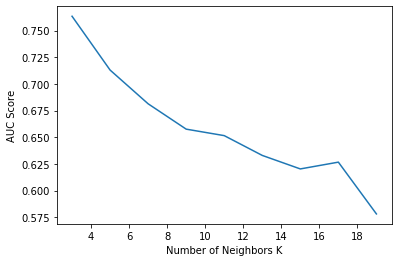

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Optimal_k_Plot(knn)

#### Setting the k value as 3 as per above graph

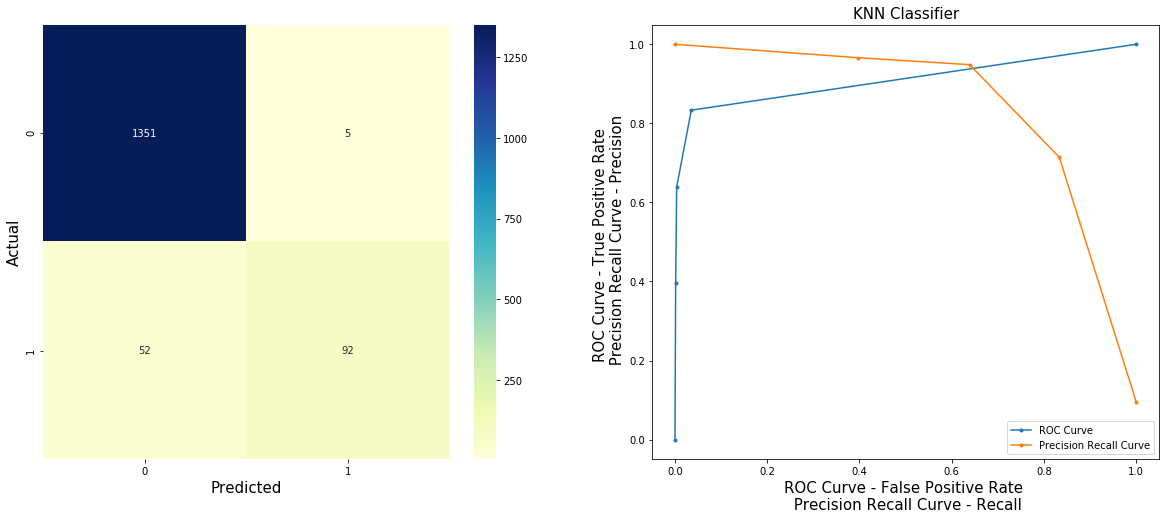

<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1351,5
1,52,92
,Training,Testing
Accuracy,0.979143,0.962000
Mean Squared Error,0.020857,0.038000
Precision,0.981685,0.948454
Recall,0.797619,0.638889
F1 Score,0.880131,0.763485
ROC AUC Score,0.898019,0.817601


In [115]:
knn = KNeighborsClassifier(n_neighbors=3)
cmKNN, dfKNN = Modelling_Prediction_Scores(knn, 'KNN Classifier')

#### Observations

1. Type-I Error (FP) = 5, a good reduction from both Logistic Regression and Naive Bayes classifier.
2. Type-II Error (FN) = 52, looks almost same for all models built so far. 
3. **Accuracy** is high, above 96%. 
4. Though **Accuracy** is higher, we need to look at Precision, Recall and AUC under Precision-Recall Curve since the target variable is imbalaced.
5. The metrics on Training and Testing sets are closer.
6. **ROC Curve** as well as **Precision-Recall Curve** looks good in the plot 
7. **Precision** is higher compared to other models at 0.94.
8. Looking at the values of Precision(0.95), Recall(0.63) and AUC(0.85), this looks like a good model. 

### Let us try to see if the model can be improved with weights as 'distance' and Euclidean distance

The optimal number of neighbors is 3


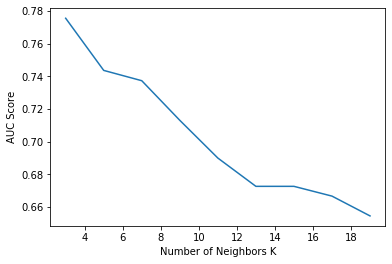

In [116]:
knn = KNeighborsClassifier(weights='distance',p=2)
Optimal_k_Plot(knn)

#### Setting the k value as 3 as per above graph

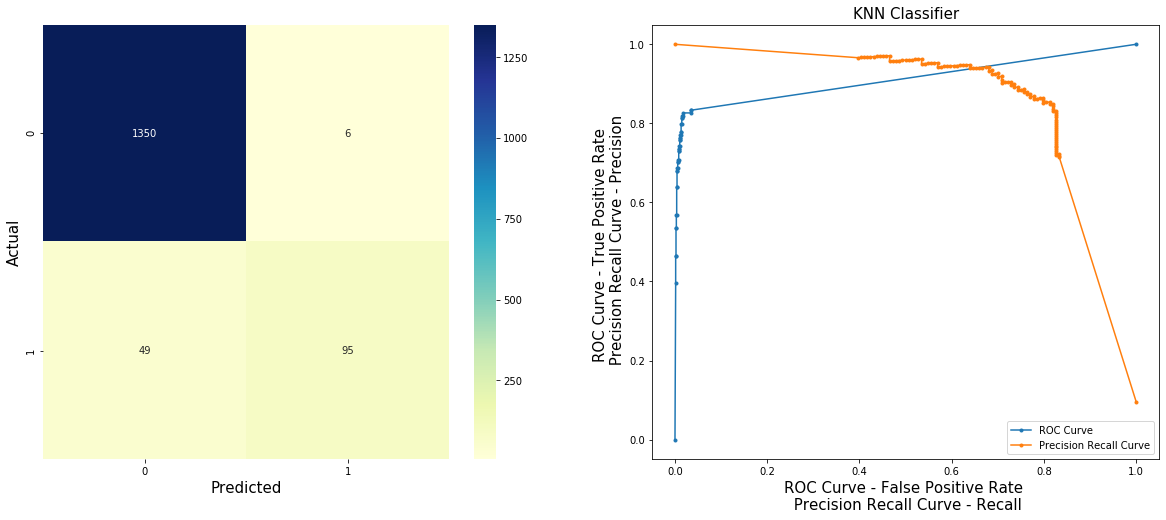

<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1350,6
1,49,95
,Training,Testing
Accuracy,1.0,0.963333
Mean Squared Error,0.0,0.036667
Precision,1.0,0.940594
Recall,1.0,0.659722
F1 Score,1.0,0.775510
ROC AUC Score,1.0,0.827649


In [117]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)
cmKNN, dfKNN = Modelling_Prediction_Scores(knn, 'KNN Classifier')

#### Observations

1. Type-I Error (FP) = 6,
2. Type-II Error (FN) = 49. This is 3 less than previous model. 
3. **Accuracy** is high, above 96%. 
6. **ROC Curve** as well as **Precision-Recall Curve** looks good in the plot 
7. **Precision** is higher compared to other models at 0.94.
8. Looking at the values of Precision(0.94), Recall(0.65) and AUC(0.86), this looks like a better model than previous one. 

### Let us try to see if the model can be further improved with Manhattan distance

The optimal number of neighbors is 3


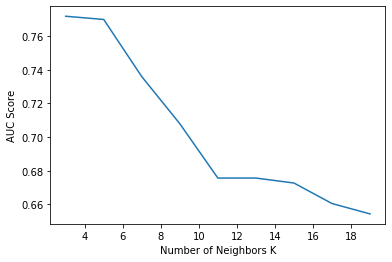

In [118]:
knn = KNeighborsClassifier(weights='distance',p=1)
Optimal_k_Plot(knn)

#### Using k value as 5 though the optimal value is 3

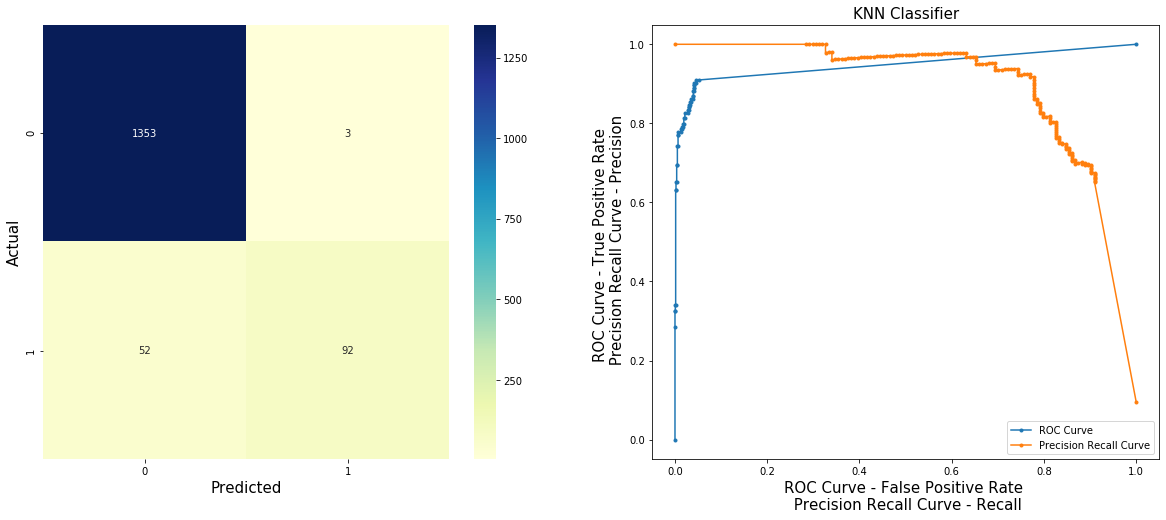

<span style='color:brown'>**Confusion Matrix**</span>

Predicted,0,1
Actual,,
0,1353,3
1,52,92
,Training,Testing
Accuracy,1.0,0.963333
Mean Squared Error,0.0,0.036667
Precision,1.0,0.968421
Recall,1.0,0.638889
F1 Score,1.0,0.769874
ROC AUC Score,1.0,0.818338


In [119]:
from sklearn.neighbors import KNeighborsClassifier

# Fit the model on train
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
cmKNN, dfKNN = Modelling_Prediction_Scores(knn, 'KNN Classifier')

#### Observations

1. Type-I Error (FP) = 3. This is lowest we got so far. 
2. Type-II Error (FN) = 52. 
3. **Accuracy** is high, above 96%. 
6. **ROC Curve** as well as **Precision-Recall Curve** looks good in the plot 
7. **Precision** is highest compared to other models at 0.97.
8. Looking at the values of Precision(0.97), Recall(0.65) and AUC(0.89), this looks like a best model so far.

### Conclusion

Based on the observations for all the models, it is decided that **K-Nearest-Neighbours** Algorithm and last built model is the best. 